# IMDB Movie Review Sentiment Analysis Using Keras

In [39]:
# Imports
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import GridSearchCV
%matplotlib inline

np.random.seed(1987)

### Load the dataset

The IMDB movie review dataset comes preloaded with Keras. We have the ability to select the number of words for each review as a parameter.

In [26]:
# Loading the data (it's preloaded in Keras)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=1000)

print(X_train.shape)
print(X_test.shape)

(25000,)
(25000,)


In [27]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


### Preprocessing the data

In [28]:
tokenizer = Tokenizer(num_words=1000)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print(X_train[0])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### Model Architecture

In [29]:
def plot_performance(history):
    plt.figure(figsize=(15,15))
    plt.subplot(211)  
    plt.plot(history.history['acc'])  
    plt.plot(history.history['val_acc'])  
    plt.title('model accuracy')  
    plt.ylabel('accuracy')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    
    plt.subplot(212)  
    plt.plot(history.history['loss'])  
    plt.plot(history.history['val_loss'])  
    plt.title('model loss')  
    plt.ylabel('loss')  
    plt.xlabel('epoch')  
    plt.legend(['train', 'test'], loc='upper left')  
    plt.show()

In [6]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 32, activation = 'relu', input_shape = X_train.shape[1:]))
    classifier.add(Dense(units = 64, activation = 'relu'))
    classifier.add(Dense(units = 128, activation = 'relu'))
    classifier.add(Dense(units = 2, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return classifier

parameters = {'batch_size': [25, 32],
              'epochs': [100, 300],
              'optimizer': ['adam', 'rmsprop']}

In [7]:
classifier = KerasClassifier(build_fn = build_classifier)
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5)

In [8]:
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
20000/20000 [==============================] - 2s 77us/step - loss: 0.3874 - acc: 0.8266
Epoch 2/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.3064 - acc: 0.8679
Epoch 3/100
20000/20000 [==============================] - 1s 66us/step - loss: 0.2725 - acc: 0.8820
Epoch 4/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.2258 - acc: 0.9063
Epoch 5/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.1653 - acc: 0.9326
Epoch 6/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.1205 - acc: 0.9529
Epoch 7/100
20000/20000 [==============================] - 1s 68us/step - loss: 0.0848 - acc: 0.9676
Epoch 8/100
20000/20000 [==============================] - 1s 69us/step - loss: 0.0595 - acc: 0.9784
Epoch 9/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.0482 - acc: 0.9824
Epoch 10/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.0405 - a

20000/20000 [==============================] - 1s 66us/step - loss: 7.9652e-07 - acc: 1.0000
Epoch 82/100
20000/20000 [==============================] - 1s 66us/step - loss: 5.5567e-07 - acc: 1.0000
Epoch 83/100
20000/20000 [==============================] - 1s 66us/step - loss: 3.9788e-07 - acc: 1.0000
Epoch 84/100
20000/20000 [==============================] - 1s 66us/step - loss: 2.9736e-07 - acc: 1.0000
Epoch 85/100
20000/20000 [==============================] - 1s 67us/step - loss: 2.3229e-07 - acc: 1.0000
Epoch 86/100
20000/20000 [==============================] - 1s 67us/step - loss: 1.9093e-07 - acc: 1.0000
Epoch 87/100
20000/20000 [==============================] - 1s 67us/step - loss: 1.6430e-07 - acc: 1.0000
Epoch 88/100
20000/20000 [==============================] - 1s 67us/step - loss: 1.4758e-07 - acc: 1.0000
Epoch 89/100
20000/20000 [==============================] - 1s 66us/step - loss: 1.3708e-07 - acc: 1.0000
Epoch 90/100
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 67us/step - loss: 0.0049 - acc: 0.9986
Epoch 61/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.0071 - acc: 0.9981
Epoch 62/100
20000/20000 [==============================] - 1s 68us/step - loss: 0.0060 - acc: 0.9983
Epoch 63/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.0039 - acc: 0.9989
Epoch 64/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.0058 - acc: 0.9980
Epoch 65/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.0037 - acc: 0.9989
Epoch 66/100
20000/20000 [==============================] - 1s 68us/step - loss: 0.0038 - acc: 0.9991
Epoch 67/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.0040 - acc: 0.9988
Epoch 68/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.0030 - acc: 0.9990
Epoch 69/100
20000/20000 [==============================] - 1s 67us/step - loss: 0.0045 - acc: 

20000/20000 [==============================] - 1s 69us/step - loss: 0.0089 - acc: 0.9971
Epoch 40/100
20000/20000 [==============================] - 1s 68us/step - loss: 0.0109 - acc: 0.9963
Epoch 41/100
20000/20000 [==============================] - 1s 68us/step - loss: 0.0069 - acc: 0.9975
Epoch 42/100
20000/20000 [==============================] - 1s 69us/step - loss: 0.0067 - acc: 0.9979
Epoch 43/100
20000/20000 [==============================] - 1s 68us/step - loss: 0.0077 - acc: 0.9978
Epoch 44/100
20000/20000 [==============================] - 1s 69us/step - loss: 0.0095 - acc: 0.9967
Epoch 45/100
20000/20000 [==============================] - 1s 68us/step - loss: 0.0038 - acc: 0.9989
Epoch 46/100
20000/20000 [==============================] - 1s 69us/step - loss: 0.0052 - acc: 0.9980
Epoch 47/100
20000/20000 [==============================] - 1s 68us/step - loss: 0.0081 - acc: 0.9974
Epoch 48/100
20000/20000 [==============================] - 1s 69us/step - loss: 0.0081 - acc: 

20000/20000 [==============================] - 1s 66us/step - loss: 0.0202 - acc: 0.9926
Epoch 19/100
20000/20000 [==============================] - 1s 64us/step - loss: 0.0200 - acc: 0.9923
Epoch 20/100
20000/20000 [==============================] - 1s 65us/step - loss: 0.0189 - acc: 0.9935
Epoch 21/100
20000/20000 [==============================] - 1s 65us/step - loss: 0.0145 - acc: 0.9956
Epoch 22/100
20000/20000 [==============================] - 1s 64us/step - loss: 0.0161 - acc: 0.9947
Epoch 23/100
20000/20000 [==============================] - 1s 65us/step - loss: 0.0141 - acc: 0.9956
Epoch 24/100
20000/20000 [==============================] - 1s 65us/step - loss: 0.0120 - acc: 0.9957
Epoch 25/100
20000/20000 [==============================] - 1s 65us/step - loss: 0.0112 - acc: 0.9965
Epoch 26/100
20000/20000 [==============================] - 1s 65us/step - loss: 0.0130 - acc: 0.9953
Epoch 27/100
20000/20000 [==============================] - 1s 64us/step - loss: 0.0130 - acc: 

20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 97/100
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 98/100
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 99/100
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 100/100
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/100
20000/20000 [==============================] - 2s 80us/step - loss: 0.3906 - acc: 0.8218
Epoch 2/100
20000/20000 [==============================] - 1s 66us/step - loss: 0.3127 - acc: 0.8646
Epoch 3/100
20000/20000 [==============================] - 1s 66us/step - loss: 0.2866 - acc: 0.8778
Epoch 4/100
20000/20000 [==============================] - 1s 65us/step - loss: 0.2478 - acc: 0.8946
Epoch 5/100
20000/20000 [==============================] - 1s 66us/step - loss

20000/20000 [==============================] - 1s 68us/step - loss: 0.0070 - acc: 0.9979
Epoch 77/100
20000/20000 [==============================] - 1s 66us/step - loss: 0.0022 - acc: 0.9996
Epoch 78/100
20000/20000 [==============================] - 1s 66us/step - loss: 8.8812e-05 - acc: 1.0000
Epoch 79/100
20000/20000 [==============================] - 1s 66us/step - loss: 1.6554e-05 - acc: 1.0000
Epoch 80/100
20000/20000 [==============================] - 1s 65us/step - loss: 9.3671e-06 - acc: 1.0000
Epoch 81/100
20000/20000 [==============================] - 1s 66us/step - loss: 5.6460e-06 - acc: 1.0000
Epoch 82/100
20000/20000 [==============================] - 1s 65us/step - loss: 3.4834e-06 - acc: 1.0000
Epoch 83/100
20000/20000 [==============================] - 1s 65us/step - loss: 2.1903e-06 - acc: 1.0000
Epoch 84/100
20000/20000 [==============================] - 1s 65us/step - loss: 1.4039e-06 - acc: 1.0000
Epoch 85/100
20000/20000 [==============================] - 1s 65us

20000/20000 [==============================] - 1s 60us/step - loss: 0.0034 - acc: 0.9996
Epoch 56/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0050 - acc: 0.9994
Epoch 57/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0056 - acc: 0.9992
Epoch 58/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0042 - acc: 0.9994
Epoch 59/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0029 - acc: 0.9995
Epoch 60/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0034 - acc: 0.9994
Epoch 61/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0046 - acc: 0.9994
Epoch 62/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0040 - acc: 0.9993
Epoch 63/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0042 - acc: 0.9994
Epoch 64/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0018 - acc: 

20000/20000 [==============================] - 1s 61us/step - loss: 0.0024 - acc: 0.9998
Epoch 36/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0036 - acc: 0.9997
Epoch 37/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0022 - acc: 0.9998
Epoch 38/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0021 - acc: 0.9998
Epoch 39/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0016 - acc: 0.9999
Epoch 40/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0016 - acc: 0.9999
Epoch 41/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0016 - acc: 0.9999
Epoch 42/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0016 - acc: 0.9999
Epoch 43/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0016 - acc: 0.9999
Epoch 44/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0016 - acc: 

20000/20000 [==============================] - 1s 61us/step - loss: 0.0380 - acc: 0.9895
Epoch 16/100
20000/20000 [==============================] - 1s 66us/step - loss: 0.0342 - acc: 0.9901
Epoch 17/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0278 - acc: 0.9923
Epoch 18/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0257 - acc: 0.9936
Epoch 19/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0253 - acc: 0.9936
Epoch 20/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0204 - acc: 0.9945
Epoch 21/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0221 - acc: 0.9946
Epoch 22/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0205 - acc: 0.9948
Epoch 23/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0203 - acc: 0.9948
Epoch 24/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0126 - acc: 

20000/20000 [==============================] - 1s 62us/step - loss: 0.0096 - acc: 0.9980
Epoch 96/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0137 - acc: 0.9976
Epoch 97/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0122 - acc: 0.9974
Epoch 98/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0123 - acc: 0.9975
Epoch 99/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0118 - acc: 0.9978
Epoch 100/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0152 - acc: 0.9971
Epoch 1/100
20000/20000 [==============================] - 2s 80us/step - loss: 0.3957 - acc: 0.8239
Epoch 2/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.3185 - acc: 0.8678
Epoch 3/100
20000/20000 [==============================] - 1s 63us/step - loss: 0.2872 - acc: 0.8840
Epoch 4/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.2580 - acc: 0.9

20000/20000 [==============================] - 1s 62us/step - loss: 0.0033 - acc: 0.9997
Epoch 76/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0023 - acc: 0.9998
Epoch 77/100
20000/20000 [==============================] - 1s 63us/step - loss: 0.0023 - acc: 0.9998
Epoch 78/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0034 - acc: 0.9996
Epoch 79/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0023 - acc: 0.9998
Epoch 80/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0023 - acc: 0.9998
Epoch 81/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0023 - acc: 0.9998
Epoch 82/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0023 - acc: 0.9998
Epoch 83/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0023 - acc: 0.9998
Epoch 84/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0022 - acc: 

20000/20000 [==============================] - 1s 65us/step - loss: 8.0603e-04 - acc: 0.9999
Epoch 55/100
20000/20000 [==============================] - 1s 65us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 56/100
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 57/100
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 58/100
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 59/100
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 60/100
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 61/100
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 62/100
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 63/100
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 69us/step - loss: 0.0084 - acc: 0.9970
Epoch 33/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0099 - acc: 0.9970
Epoch 34/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0085 - acc: 0.9971
Epoch 35/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0077 - acc: 0.9972
Epoch 36/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0096 - acc: 0.9967
Epoch 37/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0072 - acc: 0.9975
Epoch 38/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0036 - acc: 0.9989
Epoch 39/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0100 - acc: 0.9965
Epoch 40/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0080 - acc: 0.9972
Epoch 41/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0059 - acc: 

20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 111/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 112/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 113/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 114/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 115/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 116/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 117/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 118/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 119/300
20000/20000 [========================

20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 187/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 188/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 189/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 190/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 191/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 192/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 193/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 194/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 195/300
20000/20000 [========================

20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 263/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 264/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 265/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 266/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 267/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 268/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 269/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 270/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 271/300
20000/20000 [========================

20000/20000 [==============================] - 1s 69us/step - loss: 0.0080 - acc: 0.9978
Epoch 41/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0058 - acc: 0.9978
Epoch 42/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0057 - acc: 0.9977
Epoch 43/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0082 - acc: 0.9974
Epoch 44/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0074 - acc: 0.9976
Epoch 45/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0064 - acc: 0.9979
Epoch 46/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0058 - acc: 0.9983
Epoch 47/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0043 - acc: 0.9986
Epoch 48/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0081 - acc: 0.9975
Epoch 49/300
20000/20000 [==============================] - 1s 70us/step - loss: 8.8460e-04 - a

Epoch 118/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 119/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 120/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 121/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 122/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 123/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 124/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 125/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 126/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 127/300
20000/20000 [==========

20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 195/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 196/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 197/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 198/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 199/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 200/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 201/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 202/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 203/300
20000/20000 [========================

20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 271/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 272/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 273/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 274/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 275/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 276/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 277/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 278/300
20000/20000 [==============================] - 1s 69us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 279/300
20000/20000 [========================

20000/20000 [==============================] - 1s 70us/step - loss: 0.0049 - acc: 0.9981
Epoch 50/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0059 - acc: 0.9985
Epoch 51/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0074 - acc: 0.9974
Epoch 52/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0051 - acc: 0.9985
Epoch 53/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0043 - acc: 0.9984
Epoch 54/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0092 - acc: 0.9978
Epoch 55/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0019 - acc: 0.9994
Epoch 56/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0049 - acc: 0.9983
Epoch 57/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0036 - acc: 0.9989
Epoch 58/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0046 - acc: 

20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 128/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 129/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 130/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 131/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 132/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 133/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 134/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 135/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 136/300
20000/20000 [========================

20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 204/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 205/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 206/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 207/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 208/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 209/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 210/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 211/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 212/300
20000/20000 [========================

20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 280/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 281/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 282/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 283/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 284/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 285/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 286/300
20000/20000 [==============================] - 1s 70us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 287/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 288/300
20000/20000 [========================

20000/20000 [==============================] - 1s 71us/step - loss: 0.0030 - acc: 0.9989
Epoch 59/300
20000/20000 [==============================] - 1s 71us/step - loss: 0.0045 - acc: 0.9984
Epoch 60/300
20000/20000 [==============================] - 1s 71us/step - loss: 0.0048 - acc: 0.9983
Epoch 61/300
20000/20000 [==============================] - 1s 71us/step - loss: 0.0034 - acc: 0.9991
Epoch 62/300
20000/20000 [==============================] - 1s 71us/step - loss: 0.0081 - acc: 0.9975
Epoch 63/300
20000/20000 [==============================] - 1s 71us/step - loss: 0.0038 - acc: 0.9989
Epoch 64/300
20000/20000 [==============================] - 1s 71us/step - loss: 0.0066 - acc: 0.9979
Epoch 65/300
20000/20000 [==============================] - 1s 71us/step - loss: 0.0043 - acc: 0.9984
Epoch 66/300
20000/20000 [==============================] - 1s 71us/step - loss: 0.0027 - acc: 0.9993
Epoch 67/300
20000/20000 [==============================] - 1s 71us/step - loss: 0.0061 - acc: 

20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 136/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 137/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 138/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 139/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 140/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 141/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 142/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 143/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 144/300
20000/20000 [========================

20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 212/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 213/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 214/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 215/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 216/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 217/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 218/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 219/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 220/300
20000/20000 [========================

20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 288/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 289/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 290/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 291/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 292/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 293/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 294/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 295/300
20000/20000 [==============================] - 1s 71us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 296/300
20000/20000 [========================

20000/20000 [==============================] - 1s 72us/step - loss: 0.0035 - acc: 0.9990
Epoch 67/300
20000/20000 [==============================] - 1s 72us/step - loss: 0.0063 - acc: 0.9983
Epoch 68/300
20000/20000 [==============================] - 1s 72us/step - loss: 0.0073 - acc: 0.9978
Epoch 69/300
20000/20000 [==============================] - 1s 72us/step - loss: 0.0011 - acc: 0.9997
Epoch 70/300
20000/20000 [==============================] - 1s 73us/step - loss: 7.2575e-04 - acc: 0.9998
Epoch 71/300
20000/20000 [==============================] - 1s 72us/step - loss: 0.0065 - acc: 0.9979
Epoch 72/300
20000/20000 [==============================] - 1s 72us/step - loss: 0.0032 - acc: 0.9990
Epoch 73/300
20000/20000 [==============================] - 1s 74us/step - loss: 0.0063 - acc: 0.9977
Epoch 74/300
20000/20000 [==============================] - 1s 74us/step - loss: 7.6112e-04 - acc: 0.9998
Epoch 75/300
20000/20000 [==============================] - 1s 74us/step - loss: 0.0038

20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 145/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 146/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 147/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 148/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 149/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 150/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 151/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 152/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 153/300
20000/20000 [========================

20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 221/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 222/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 223/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 224/300
20000/20000 [==============================] - 1s 72us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 225/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 226/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 227/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 228/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 229/300
20000/20000 [========================

20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 297/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 298/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 299/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 300/300
20000/20000 [==============================] - 1s 73us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/300
20000/20000 [==============================] - 2s 94us/step - loss: 0.3932 - acc: 0.8251
Epoch 2/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.3204 - acc: 0.8665
Epoch 3/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.2903 - acc: 0.8834
Epoch 4/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.2643 - acc: 0.8976
Epoch 5/300
20000/20000 [==============================] - 1s 68us/step - l

20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 75/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 76/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 77/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 78/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 79/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 80/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 81/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 82/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 83/300
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 151/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 152/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 153/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 154/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 155/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 156/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0012 - acc: 0.9998
Epoch 157/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1936e-07 - acc: 1.0000
Epoch 158/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 159/300
20000/20000 [============================

20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 227/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 228/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 229/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 230/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 231/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 232/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 233/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 234/300
20000/20000 [==============================] - 1s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 235/300
20000/20000 [========================

20000/20000 [==============================] - 1s 68us/step - loss: 0.3225 - acc: 0.8667
Epoch 3/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.2953 - acc: 0.8808
Epoch 4/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.2672 - acc: 0.8945
Epoch 5/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.2313 - acc: 0.9138
Epoch 6/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.1947 - acc: 0.9315
Epoch 7/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.1610 - acc: 0.9463
Epoch 8/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.1323 - acc: 0.9578
Epoch 9/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.1070 - acc: 0.9655
Epoch 10/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0868 - acc: 0.9734
Epoch 11/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0722 - acc: 0.9778


20000/20000 [==============================] - 1s 73us/step - loss: 0.0100 - acc: 0.9978
Epoch 83/300
20000/20000 [==============================] - 1s 73us/step - loss: 0.0209 - acc: 0.9963
Epoch 84/300
20000/20000 [==============================] - 1s 73us/step - loss: 0.0136 - acc: 0.9973
Epoch 85/300
20000/20000 [==============================] - 1s 73us/step - loss: 0.0179 - acc: 0.9965
Epoch 86/300
20000/20000 [==============================] - 1s 73us/step - loss: 0.0145 - acc: 0.9973
Epoch 87/300
20000/20000 [==============================] - 1s 72us/step - loss: 0.0134 - acc: 0.9977
Epoch 88/300
20000/20000 [==============================] - 1s 73us/step - loss: 0.0104 - acc: 0.9977
Epoch 89/300
20000/20000 [==============================] - 1s 73us/step - loss: 0.0137 - acc: 0.9977
Epoch 90/300
20000/20000 [==============================] - 1s 73us/step - loss: 0.0196 - acc: 0.9963
Epoch 91/300
20000/20000 [==============================] - 1s 70us/step - loss: 0.0157 - acc: 

20000/20000 [==============================] - 1s 68us/step - loss: 0.0204 - acc: 0.9962
Epoch 162/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0243 - acc: 0.9953
Epoch 163/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0286 - acc: 0.9950
Epoch 164/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0332 - acc: 0.9951
Epoch 165/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0208 - acc: 0.9966
Epoch 166/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0278 - acc: 0.9952
Epoch 167/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0212 - acc: 0.9963
Epoch 168/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0244 - acc: 0.9954
Epoch 169/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0266 - acc: 0.9954
Epoch 170/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.023

20000/20000 [==============================] - 1s 68us/step - loss: 0.2419 - acc: 0.9354
Epoch 241/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.2217 - acc: 0.9352
Epoch 242/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.2275 - acc: 0.9348
Epoch 243/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.2321 - acc: 0.9355
Epoch 244/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.2446 - acc: 0.9279
Epoch 245/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.2316 - acc: 0.9332
Epoch 246/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.2449 - acc: 0.9281
Epoch 247/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.2428 - acc: 0.9267
Epoch 248/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.2456 - acc: 0.9249
Epoch 249/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.240

Epoch 20/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0242 - acc: 0.9943
Epoch 21/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0287 - acc: 0.9931
Epoch 22/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0242 - acc: 0.9943
Epoch 23/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0280 - acc: 0.9939
Epoch 24/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0289 - acc: 0.9950
Epoch 25/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0281 - acc: 0.9944
Epoch 26/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0237 - acc: 0.9952
Epoch 27/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0244 - acc: 0.9947
Epoch 28/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0216 - acc: 0.9956
Epoch 29/300
20000/20000 [==============================] - 1s 68us/step - loss: 0

20000/20000 [==============================] - 1s 69us/step - loss: 0.0283 - acc: 0.9954
Epoch 101/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0306 - acc: 0.9948
Epoch 102/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0395 - acc: 0.9932
Epoch 103/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0383 - acc: 0.9948
Epoch 104/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0321 - acc: 0.9956
Epoch 105/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0355 - acc: 0.9955
Epoch 106/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0279 - acc: 0.9947
Epoch 107/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0489 - acc: 0.9919
Epoch 108/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0535 - acc: 0.9909
Epoch 109/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.050

20000/20000 [==============================] - 1s 67us/step - loss: 0.0208 - acc: 0.9966
Epoch 180/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0265 - acc: 0.9955
Epoch 181/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0261 - acc: 0.9959
Epoch 182/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0242 - acc: 0.9957
Epoch 183/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0191 - acc: 0.9968
Epoch 184/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0180 - acc: 0.9969
Epoch 185/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0253 - acc: 0.9957
Epoch 186/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0246 - acc: 0.9956
Epoch 187/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0219 - acc: 0.9963
Epoch 188/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.018

20000/20000 [==============================] - 1s 68us/step - loss: 0.0478 - acc: 0.9917
Epoch 259/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0349 - acc: 0.9940
Epoch 260/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0331 - acc: 0.9943
Epoch 261/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0270 - acc: 0.9946
Epoch 262/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0276 - acc: 0.9950
Epoch 263/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0363 - acc: 0.9936
Epoch 264/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0297 - acc: 0.9945
Epoch 265/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0316 - acc: 0.9946
Epoch 266/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0277 - acc: 0.9947
Epoch 267/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.033

20000/20000 [==============================] - 1s 68us/step - loss: 0.0069 - acc: 0.9985
Epoch 39/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0183 - acc: 0.9971
Epoch 40/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0123 - acc: 0.9982
Epoch 41/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0103 - acc: 0.9979
Epoch 42/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0116 - acc: 0.9978
Epoch 43/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0124 - acc: 0.9976
Epoch 44/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0083 - acc: 0.9982
Epoch 45/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0092 - acc: 0.9982
Epoch 46/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0099 - acc: 0.9980
Epoch 47/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0120 - acc: 

20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 119/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 120/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 121/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 122/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 123/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 124/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0016 - acc: 0.9999
Epoch 125/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 126/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 127/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.001

20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 198/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0016 - acc: 0.9999
Epoch 199/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 200/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0016 - acc: 0.9999
Epoch 201/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 202/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 203/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 204/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 205/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 206/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.001

20000/20000 [==============================] - 1s 69us/step - loss: 0.0016 - acc: 0.9999
Epoch 277/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 278/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 279/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 280/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 281/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 282/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 283/300
20000/20000 [==============================] - 1s 68us/step - loss: 0.0016 - acc: 0.9999
Epoch 284/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.0016 - acc: 0.9999
Epoch 285/300
20000/20000 [==============================] - 1s 69us/step - loss: 0.001

20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 57/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 58/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 59/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 60/300
20000/20000 [==============================] - 1s 72us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 61/300
20000/20000 [==============================] - 1s 70us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 62/300
20000/20000 [==============================] - 1s 70us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 63/300
20000/20000 [==============================] - 1s 70us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 64/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 65/300
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 134/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 135/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 136/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 137/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 138/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 139/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 140/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 141/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 142/300
20000/20000 [========================

20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 210/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 211/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 212/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 213/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 214/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 215/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 216/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 217/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 218/300
20000/20000 [========================

20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 286/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 287/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 288/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 289/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 290/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 291/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 292/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 293/300
20000/20000 [==============================] - 1s 69us/step - loss: 8.0602e-04 - acc: 0.9999
Epoch 294/300
20000/20000 [========================

20000/20000 [==============================] - 1s 60us/step - loss: 2.4868e-05 - acc: 1.0000
Epoch 65/100
20000/20000 [==============================] - 1s 60us/step - loss: 1.0968e-05 - acc: 1.0000
Epoch 66/100
20000/20000 [==============================] - 1s 60us/step - loss: 5.5204e-06 - acc: 1.0000
Epoch 67/100
20000/20000 [==============================] - 1s 60us/step - loss: 3.4487e-06 - acc: 1.0000
Epoch 68/100
20000/20000 [==============================] - 1s 60us/step - loss: 2.5001e-06 - acc: 1.0000
Epoch 69/100
20000/20000 [==============================] - 1s 60us/step - loss: 1.8634e-06 - acc: 1.0000
Epoch 70/100
20000/20000 [==============================] - 1s 60us/step - loss: 1.4509e-06 - acc: 1.0000
Epoch 71/100
20000/20000 [==============================] - 1s 60us/step - loss: 1.1499e-06 - acc: 1.0000
Epoch 72/100
20000/20000 [==============================] - 1s 60us/step - loss: 9.1422e-07 - acc: 1.0000
Epoch 73/100
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 60us/step - loss: 0.0097 - acc: 0.9963
Epoch 44/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0108 - acc: 0.9972
Epoch 45/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0047 - acc: 0.9986
Epoch 46/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0065 - acc: 0.9982
Epoch 47/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0084 - acc: 0.9972
Epoch 48/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0073 - acc: 0.9977
Epoch 49/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0057 - acc: 0.9981
Epoch 50/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0040 - acc: 0.9987
Epoch 51/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0080 - acc: 0.9974
Epoch 52/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0063 - acc: 

20000/20000 [==============================] - 1s 60us/step - loss: 0.0147 - acc: 0.9955
Epoch 23/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0177 - acc: 0.9936
Epoch 24/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0149 - acc: 0.9953
Epoch 25/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0096 - acc: 0.9976
Epoch 26/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0148 - acc: 0.9956
Epoch 27/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0117 - acc: 0.9959
Epoch 28/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0114 - acc: 0.9961
Epoch 29/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0120 - acc: 0.9963
Epoch 30/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0092 - acc: 0.9970
Epoch 31/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0106 - acc: 

20000/20000 [==============================] - 2s 104us/step - loss: 0.3938 - acc: 0.8224
Epoch 2/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.3079 - acc: 0.8687
Epoch 3/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.2806 - acc: 0.8789
Epoch 4/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.2465 - acc: 0.8941
Epoch 5/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.1991 - acc: 0.9172
Epoch 6/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.1468 - acc: 0.9399
Epoch 7/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.1088 - acc: 0.9587
Epoch 8/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0769 - acc: 0.9707
Epoch 9/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0530 - acc: 0.9818
Epoch 10/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0395 - acc: 0.9861


20000/20000 [==============================] - 1s 62us/step - loss: 0.0052 - acc: 0.9983
Epoch 82/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0020 - acc: 0.9992
Epoch 83/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0017 - acc: 0.9995
Epoch 84/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0058 - acc: 0.9982
Epoch 85/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0015 - acc: 0.9996
Epoch 86/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0019 - acc: 0.9995
Epoch 87/100
20000/20000 [==============================] - 1s 61us/step - loss: 0.0026 - acc: 0.9991
Epoch 88/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0018 - acc: 0.9996
Epoch 89/100
20000/20000 [==============================] - 1s 62us/step - loss: 1.2743e-04 - acc: 1.0000
Epoch 90/100
20000/20000 [==============================] - 1s 62us/step - loss: 1.2293e-05

20000/20000 [==============================] - 1s 63us/step - loss: 0.0044 - acc: 0.9986
Epoch 62/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0053 - acc: 0.9982
Epoch 63/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0028 - acc: 0.9991
Epoch 64/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0059 - acc: 0.9981
Epoch 65/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0045 - acc: 0.9982
Epoch 66/100
20000/20000 [==============================] - 1s 63us/step - loss: 0.0065 - acc: 0.9978
Epoch 67/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0045 - acc: 0.9988
Epoch 68/100
20000/20000 [==============================] - 1s 63us/step - loss: 0.0059 - acc: 0.9980
Epoch 69/100
20000/20000 [==============================] - 1s 63us/step - loss: 0.0038 - acc: 0.9987
Epoch 70/100
20000/20000 [==============================] - 1s 62us/step - loss: 0.0032 - acc: 

20000/20000 [==============================] - 1s 58us/step - loss: 0.0033 - acc: 0.9994
Epoch 41/100
20000/20000 [==============================] - 1s 58us/step - loss: 0.0023 - acc: 0.9996
Epoch 42/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0032 - acc: 0.9996
Epoch 43/100
20000/20000 [==============================] - 1s 58us/step - loss: 0.0025 - acc: 0.9996
Epoch 44/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0018 - acc: 0.9996
Epoch 45/100
20000/20000 [==============================] - 1s 58us/step - loss: 0.0032 - acc: 0.9994
Epoch 46/100
20000/20000 [==============================] - 1s 58us/step - loss: 0.0050 - acc: 0.9994
Epoch 47/100
20000/20000 [==============================] - 1s 58us/step - loss: 0.0029 - acc: 0.9996
Epoch 48/100
20000/20000 [==============================] - 1s 58us/step - loss: 0.0022 - acc: 0.9996
Epoch 49/100
20000/20000 [==============================] - 1s 58us/step - loss: 0.0043 - acc: 

20000/20000 [==============================] - 1s 59us/step - loss: 0.0160 - acc: 0.9960
Epoch 21/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0111 - acc: 0.9973
Epoch 22/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0074 - acc: 0.9978
Epoch 23/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0088 - acc: 0.9979
Epoch 24/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0069 - acc: 0.9986
Epoch 25/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0072 - acc: 0.9983
Epoch 26/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0035 - acc: 0.9988
Epoch 27/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0043 - acc: 0.9989
Epoch 28/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0060 - acc: 0.9985
Epoch 29/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0031 - acc: 

20000/20000 [==============================] - 1s 59us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 99/100
20000/20000 [==============================] - 1s 60us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 100/100
20000/20000 [==============================] - 1s 59us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/100
20000/20000 [==============================] - 2s 102us/step - loss: 0.3978 - acc: 0.8216
Epoch 2/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.3181 - acc: 0.8676
Epoch 3/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.2917 - acc: 0.8787
Epoch 4/100
20000/20000 [==============================] - 1s 58us/step - loss: 0.2622 - acc: 0.8953
Epoch 5/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.2275 - acc: 0.9147
Epoch 6/100
20000/20000 [==============================] - 1s 58us/step - loss: 0.1886 - acc: 0.9331
Epoch 7/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.1533 

20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 77/100
20000/20000 [==============================] - 1s 58us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 78/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 79/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 80/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 81/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 82/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 83/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 84/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 85/100
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 56/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 57/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 58/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 59/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 60/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 61/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 62/100
20000/20000 [==============================] - 1s 59us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 63/100
20000/20000 [==============================] - 1s 60us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 64/100
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 59us/step - loss: 0.0042 - acc: 0.9991
Epoch 34/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0014 - acc: 0.9996
Epoch 35/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0030 - acc: 0.9996
Epoch 36/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0056 - acc: 0.9992
Epoch 37/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0042 - acc: 0.9994
Epoch 38/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0011 - acc: 0.9997
Epoch 39/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0058 - acc: 0.9990
Epoch 40/100
20000/20000 [==============================] - 1s 59us/step - loss: 0.0016 - acc: 0.9995
Epoch 41/100
20000/20000 [==============================] - 1s 59us/step - loss: 4.5026e-04 - acc: 0.9999
Epoch 42/100
20000/20000 [==============================] - 1s 60us/step - loss: 0.0051 - a

20000/20000 [==============================] - 1s 64us/step - loss: 0.0330 - acc: 0.9876
Epoch 12/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0325 - acc: 0.9888
Epoch 13/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0259 - acc: 0.9909
Epoch 14/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0308 - acc: 0.9904
Epoch 15/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0172 - acc: 0.9942
Epoch 16/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0223 - acc: 0.9926
Epoch 17/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0183 - acc: 0.9932
Epoch 18/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0179 - acc: 0.9940
Epoch 19/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0162 - acc: 0.9942
Epoch 20/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0193 - acc: 

20000/20000 [==============================] - 1s 63us/step - loss: 1.2508e-07 - acc: 1.0000
Epoch 91/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.2331e-07 - acc: 1.0000
Epoch 92/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.2205e-07 - acc: 1.0000
Epoch 93/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.2119e-07 - acc: 1.0000
Epoch 94/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.2056e-07 - acc: 1.0000
Epoch 95/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.2010e-07 - acc: 1.0000
Epoch 96/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.1984e-07 - acc: 1.0000
Epoch 97/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1962e-07 - acc: 1.0000
Epoch 98/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.1947e-07 - acc: 1.0000
Epoch 99/300
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 167/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 168/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 169/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 170/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 171/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 172/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 173/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 174/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 175/300
20000/20000 [========================

20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 243/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 244/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 245/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 246/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 247/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 248/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 249/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 250/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 251/300
20000/20000 [========================

20000/20000 [==============================] - 1s 67us/step - loss: 0.0164 - acc: 0.9946
Epoch 20/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0146 - acc: 0.9949
Epoch 21/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0144 - acc: 0.9950
Epoch 22/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0177 - acc: 0.9945
Epoch 23/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0050 - acc: 0.9983
Epoch 24/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0151 - acc: 0.9949
Epoch 25/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0171 - acc: 0.9942
Epoch 26/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0142 - acc: 0.9952
Epoch 27/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0131 - acc: 0.9954
Epoch 28/300
20000/20000 [==============================] - 1s 67us/step - loss: 0.0120 - acc: 

20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 98/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 99/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 100/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 101/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 102/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 103/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 104/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 105/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 106/300
20000/20000 [==========================

20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 174/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 175/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 176/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 177/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 178/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 179/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 180/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 181/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 182/300
20000/20000 [========================

20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 250/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 251/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 252/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 253/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 254/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 255/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 256/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 257/300
20000/20000 [==============================] - 1s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 258/300
20000/20000 [========================

Epoch 27/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0154 - acc: 0.9947
Epoch 28/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0110 - acc: 0.9964
Epoch 29/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0121 - acc: 0.9960
Epoch 30/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0115 - acc: 0.9960
Epoch 31/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0091 - acc: 0.9966
Epoch 32/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0107 - acc: 0.9962
Epoch 33/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0104 - acc: 0.9963
Epoch 34/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0063 - acc: 0.9979
Epoch 35/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0099 - acc: 0.9966
Epoch 36/300
20000/20000 [==============================] - 1s 65us/step - loss: 0

20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 106/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 107/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 108/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 109/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 110/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 111/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 112/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 113/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 114/300
20000/20000 [========================

20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 182/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 183/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 184/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 185/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 186/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 187/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 188/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 189/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 190/300
20000/20000 [========================

20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 258/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 259/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 260/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 261/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 262/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 263/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 264/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 265/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 266/300
20000/20000 [========================

20000/20000 [==============================] - 1s 65us/step - loss: 0.0113 - acc: 0.9964
Epoch 36/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0072 - acc: 0.9974
Epoch 37/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0105 - acc: 0.9958
Epoch 38/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0073 - acc: 0.9974
Epoch 39/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0106 - acc: 0.9965
Epoch 40/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0073 - acc: 0.9977
Epoch 41/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0107 - acc: 0.9959
Epoch 42/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0058 - acc: 0.9982
Epoch 43/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0075 - acc: 0.9974
Epoch 44/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0043 - acc: 

20000/20000 [==============================] - 1s 65us/step - loss: 1.1926e-07 - acc: 1.0000
Epoch 114/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1925e-07 - acc: 1.0000
Epoch 115/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1925e-07 - acc: 1.0000
Epoch 116/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1924e-07 - acc: 1.0000
Epoch 117/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 118/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 119/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 120/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 121/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 122/300
20000/20000 [========================

20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 190/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 191/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 192/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 193/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 194/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 195/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 196/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 197/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 198/300
20000/20000 [========================

20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 266/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 267/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 268/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 269/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 270/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 271/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 272/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 273/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 274/300
20000/20000 [========================

20000/20000 [==============================] - 1s 65us/step - loss: 0.0074 - acc: 0.9976
Epoch 44/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0050 - acc: 0.9983
Epoch 45/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0090 - acc: 0.9969
Epoch 46/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0070 - acc: 0.9978
Epoch 47/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0091 - acc: 0.9967
Epoch 48/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0044 - acc: 0.9985
Epoch 49/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0047 - acc: 0.9987
Epoch 50/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0069 - acc: 0.9978
Epoch 51/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0049 - acc: 0.9985
Epoch 52/300
20000/20000 [==============================] - 1s 66us/step - loss: 0.0080 - acc: 

20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 122/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 123/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 124/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 125/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 126/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 127/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 128/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 129/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 130/300
20000/20000 [========================

20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 198/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 199/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 200/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 201/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 202/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 203/300
20000/20000 [==============================] - 1s 65us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 204/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 205/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 206/300
20000/20000 [========================

20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 274/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 275/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 276/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 277/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 278/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 279/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 280/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 281/300
20000/20000 [==============================] - 1s 66us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 282/300
20000/20000 [========================

20000/20000 [==============================] - 1s 63us/step - loss: 1.4324e-07 - acc: 1.0000
Epoch 53/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.2000e-07 - acc: 1.0000
Epoch 54/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1935e-07 - acc: 1.0000
Epoch 55/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1927e-07 - acc: 1.0000
Epoch 56/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1925e-07 - acc: 1.0000
Epoch 57/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1924e-07 - acc: 1.0000
Epoch 58/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1923e-07 - acc: 1.0000
Epoch 59/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 60/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 61/300
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 130/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 131/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 132/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 133/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 134/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 135/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 136/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 137/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 138/300
20000/20000 [========================

20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 206/300
20000/20000 [==============================] - 1s 64us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 207/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 208/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 209/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 210/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 211/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 212/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 213/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 214/300
20000/20000 [========================

20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 282/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 283/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 284/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 285/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 286/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 287/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 288/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 289/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 290/300
20000/20000 [========================

20000/20000 [==============================] - 1s 62us/step - loss: 0.0016 - acc: 0.9997
Epoch 61/300
20000/20000 [==============================] - 1s 63us/step - loss: 9.3667e-05 - acc: 1.0000
Epoch 62/300
20000/20000 [==============================] - 1s 62us/step - loss: 8.0371e-04 - acc: 0.9998
Epoch 63/300
20000/20000 [==============================] - 1s 62us/step - loss: 9.2962e-04 - acc: 0.9999
Epoch 64/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0056 - acc: 0.9994
Epoch 65/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0032 - acc: 0.9994
Epoch 66/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0047 - acc: 0.9991
Epoch 67/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0058 - acc: 0.9992
Epoch 68/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0050 - acc: 0.9990
Epoch 69/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.

20000/20000 [==============================] - 1s 62us/step - loss: 0.0068 - acc: 0.9985
Epoch 140/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0037 - acc: 0.9991
Epoch 141/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0069 - acc: 0.9982
Epoch 142/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0081 - acc: 0.9983
Epoch 143/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0045 - acc: 0.9990
Epoch 144/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0079 - acc: 0.9985
Epoch 145/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0096 - acc: 0.9981
Epoch 146/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.0062 - acc: 0.9986
Epoch 147/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0070 - acc: 0.9987
Epoch 148/300
20000/20000 [==============================] - 1s 62us/step - loss: 0.008

20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 217/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 218/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 219/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 220/300
20000/20000 [==============================] - 1s 63us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 221/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 222/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1936e-07 - acc: 1.0000
Epoch 223/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1922e-07 - acc: 1.0000
Epoch 224/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 225/300
20000/20000 [========================

20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 293/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 294/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 295/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 296/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 297/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 298/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 299/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 300/300
20000/20000 [==============================] - 1s 62us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 1/300
20000/20000 [==========================

20000/20000 [==============================] - 1s 63us/step - loss: 0.0084 - acc: 0.9983
Epoch 73/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0139 - acc: 0.9978
Epoch 74/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0064 - acc: 0.9988
Epoch 75/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0082 - acc: 0.9985
Epoch 76/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0153 - acc: 0.9976
Epoch 77/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0162 - acc: 0.9970
Epoch 78/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0108 - acc: 0.9981
Epoch 79/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0066 - acc: 0.9989
Epoch 80/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0071 - acc: 0.9989
Epoch 81/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0125 - acc: 

20000/20000 [==============================] - 1s 63us/step - loss: 0.0136 - acc: 0.9972
Epoch 152/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0141 - acc: 0.9974
Epoch 153/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0187 - acc: 0.9966
Epoch 154/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0228 - acc: 0.9954
Epoch 155/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0230 - acc: 0.9954
Epoch 156/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0202 - acc: 0.9957
Epoch 157/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0193 - acc: 0.9958
Epoch 158/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0184 - acc: 0.9960
Epoch 159/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0158 - acc: 0.9963
Epoch 160/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.018

20000/20000 [==============================] - 1s 63us/step - loss: 0.0205 - acc: 0.9968
Epoch 231/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0185 - acc: 0.9961
Epoch 232/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0208 - acc: 0.9964
Epoch 233/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0206 - acc: 0.9967
Epoch 234/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0248 - acc: 0.9962
Epoch 235/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0271 - acc: 0.9963
Epoch 236/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0245 - acc: 0.9958
Epoch 237/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0231 - acc: 0.9962
Epoch 238/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0195 - acc: 0.9961
Epoch 239/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.023

20000/20000 [==============================] - 1s 63us/step - loss: 0.0937 - acc: 0.9698
Epoch 10/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0712 - acc: 0.9778
Epoch 11/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0596 - acc: 0.9825
Epoch 12/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0484 - acc: 0.9858
Epoch 13/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0409 - acc: 0.9878
Epoch 14/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0334 - acc: 0.9897
Epoch 15/300
20000/20000 [==============================] - 1s 65us/step - loss: 0.0269 - acc: 0.9920
Epoch 16/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0216 - acc: 0.9937
Epoch 17/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0171 - acc: 0.9958
Epoch 18/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0133 - acc: 

20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 88/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 89/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 90/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 91/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 92/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 93/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 94/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 95/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 96/300
20000/20000 [==============================] -

20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 164/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 165/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 166/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 167/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 168/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 169/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 170/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 171/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 172/300
20000/20000 [========================

20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 240/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 241/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 242/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 243/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 244/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 245/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 246/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 247/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 248/300
20000/20000 [========================

20000/20000 [==============================] - 1s 64us/step - loss: 0.0238 - acc: 0.9927
Epoch 17/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0196 - acc: 0.9947
Epoch 18/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0160 - acc: 0.9955
Epoch 19/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0150 - acc: 0.9962
Epoch 20/300
20000/20000 [==============================] - 1s 63us/step - loss: 0.0145 - acc: 0.9963
Epoch 21/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0110 - acc: 0.9975
Epoch 22/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0107 - acc: 0.9972
Epoch 23/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0095 - acc: 0.9976
Epoch 24/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0104 - acc: 0.9973
Epoch 25/300
20000/20000 [==============================] - 1s 64us/step - loss: 0.0064 - acc: 

20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 95/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 96/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 97/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 98/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 99/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 100/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 101/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 102/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 103/300
20000/20000 [=============================

20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 171/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 172/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 173/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 174/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 175/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 176/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 177/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 178/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 179/300
20000/20000 [========================

20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 247/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 248/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 249/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 250/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 251/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 252/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 253/300
20000/20000 [==============================] - 1s 63us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 254/300
20000/20000 [==============================] - 1s 64us/step - loss: 8.0602e-04 - acc: 1.0000
Epoch 255/300
20000/20000 [========================

25000/25000 [==============================] - 2s 67us/step - loss: 0.0159 - acc: 0.9951
Epoch 24/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0149 - acc: 0.9950
Epoch 25/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0176 - acc: 0.9936
Epoch 26/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0130 - acc: 0.9952
Epoch 27/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0164 - acc: 0.9945
Epoch 28/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0145 - acc: 0.9946
Epoch 29/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0114 - acc: 0.9964
Epoch 30/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0106 - acc: 0.9964
Epoch 31/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0129 - acc: 0.9956
Epoch 32/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0146 - acc: 

25000/25000 [==============================] - 2s 67us/step - loss: 0.0050 - acc: 0.9985
Epoch 104/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0015 - acc: 0.9994
Epoch 105/300
25000/25000 [==============================] - 2s 67us/step - loss: 9.5648e-04 - acc: 0.9996
Epoch 106/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0047 - acc: 0.9982
Epoch 107/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0035 - acc: 0.9990
Epoch 108/300
25000/25000 [==============================] - 2s 67us/step - loss: 6.4956e-04 - acc: 0.9998
Epoch 109/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0017 - acc: 0.9994
Epoch 110/300
25000/25000 [==============================] - 2s 67us/step - loss: 0.0047 - acc: 0.9983
Epoch 111/300
25000/25000 [==============================] - 2s 67us/step - loss: 7.4199e-04 - acc: 0.9998
Epoch 112/300
25000/25000 [==============================] - 2s 67us/step -

25000/25000 [==============================] - 2s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 181/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 182/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 183/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 184/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 185/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 186/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 187/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 188/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 189/300
25000/25000 [========================

25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 257/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 258/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 259/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 260/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 261/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 262/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 263/300
25000/25000 [==============================] - 2s 68us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 264/300
25000/25000 [==============================] - 2s 67us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 265/300
25000/25000 [========================

In [12]:
grid_search.best_params_

{'batch_size': 32, 'epochs': 300, 'optimizer': 'adam'}

### preprocessed the data further to one-hot encode output and create a validation set

In [30]:
num_classes = 2
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=1987)

In [56]:
opt_model = Sequential()
input_shape = X_train.shape[1:])
opt_model.add(Dense(units = 512, activation = 'relu'))
opt_model.add(Dropout(0.2))
opt_model.add(Dense(units = 252, activation = 'relu'))
opt_model.add(Dropout(0.4))
opt_model.add(Dense(units = 2, activation = 'softmax'))
opt_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_215 (Dense)            (None, 250)               250250    
_________________________________________________________________
dropout_11 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_216 (Dense)            (None, 512)               128512    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_217 (Dense)            (None, 2)                 1026      
Total params: 379,788
Trainable params: 379,788
Non-trainable params: 0
_________________________________________________________________


In [57]:
from keras import optimizers

adam = optimizers.Adam(lr = 0.0001)
opt_model.compile(loss = "binary_crossentropy", 
                    optimizer = adam, 
                    metrics=["accuracy"])

epochs=100
batch_size=32

In [58]:
checkpointer = ModelCheckpoint(filepath='weights.best.opt_model.hdf5', 
                               verbose=1, save_best_only=True)

opt_model_history = opt_model.fit(X_train, y_train, 
          validation_data=(X_val, y_val),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer], verbose=1)

Train on 16750 samples, validate on 8250 samples
Epoch 1/100
16750/16750 [==============================] - 5s 290us/step - loss: 0.5393 - acc: 0.7222 - val_loss: 0.3906 - val_acc: 0.8327

Epoch 00001: val_loss improved from inf to 0.39060, saving model to weights.best.opt_model.hdf5
Epoch 2/100
16750/16750 [==============================] - 3s 170us/step - loss: 0.3625 - acc: 0.8438 - val_loss: 0.3461 - val_acc: 0.8513

Epoch 00002: val_loss improved from 0.39060 to 0.34614, saving model to weights.best.opt_model.hdf5
Epoch 3/100
16750/16750 [==============================] - 3s 171us/step - loss: 0.3187 - acc: 0.8670 - val_loss: 0.3459 - val_acc: 0.8555

Epoch 00003: val_loss improved from 0.34614 to 0.34593, saving model to weights.best.opt_model.hdf5
Epoch 4/100
16750/16750 [==============================] - 3s 171us/step - loss: 0.2900 - acc: 0.8814 - val_loss: 0.3434 - val_acc: 0.8524

Epoch 00004: val_loss improved from 0.34593 to 0.34344, saving model to weights.best.opt_model.

KeyboardInterrupt: 

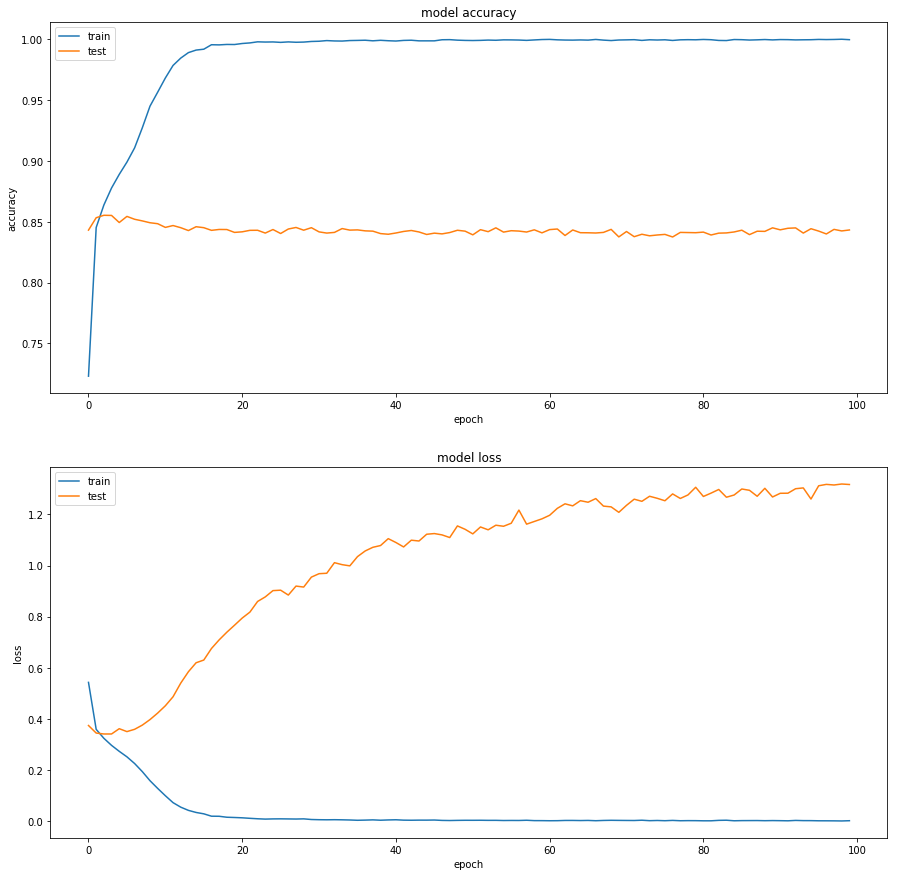

In [54]:
plot_performance(opt_model_history)

In [55]:
score = opt_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: ", score[1])

Accuracy:  0.84526
